# Módulo 2 Análisis y Reporte sobre el desempeño del modelo.
### Cristian Aldo Sandoval Suarez A01751137
---
Para este analisis, tomare la solucion del portafolio de implementacion (KNN).

In [146]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from fast_ml.model_development import train_valid_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from mlxtend.evaluate import bias_variance_decomp
import pandas as pd

### Cargado de datos
UCI ML Wine Data Set dataset

In [236]:
data = load_wine()

In [237]:
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target, columns=["target"])

scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.concat([pd.DataFrame(X), y], axis=1)

### 1. Separacion de datos para entrenamiento, pruebas y validacion.

In [238]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(
                                                                df, 
                                                                target = 'target', 
                                                                train_size=0.6, 
                                                                valid_size=0.2, 
                                                                test_size=0.2,
                                                                random_state=21
)

In [239]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(106, 13)
(106,)
(36, 13)
(36,)
(36, 13)
(36,)


(None, None)

Como se observa, tenemos listos nuestros 3 sets de datos:
- Entrenamiento: 106 registros
- Pruebas: 36 registros.
- Validacion: 36 registros.

#### Entranamiento del modelo

In [240]:
knn = KNeighborsClassifier()

In [241]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Parametros iniciales (deafult):

In [242]:
default_params = knn.get_params()
default_params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### 2. Diagnóstico del grado de bias y varianza 

In [243]:
print(f'Score: {knn.score(X_valid, y_valid)}')

Score: 1.0


In [244]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
                                        knn, 
                                        X_train.to_numpy(), 
                                        y_train.to_numpy(), 
                                        X_valid.to_numpy(), 
                                        y_valid.to_numpy(), 
                                        loss='0-1_loss',
                                        random_seed=42
)

In [245]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.019
Average bias: 0.000
Average variance: 0.019
Sklearn 0-1 loss: 0.639


### 3. Diagnostico del grado de ajuste del modelo 

Se tiene un bias y una varianza relativamente bajos, tambien se obtuvo un buen score, lo que nos indica que el modelo se encuentra casi perfectamente **balanceado**, sin embargo, podemos intenentar mejorarlo.

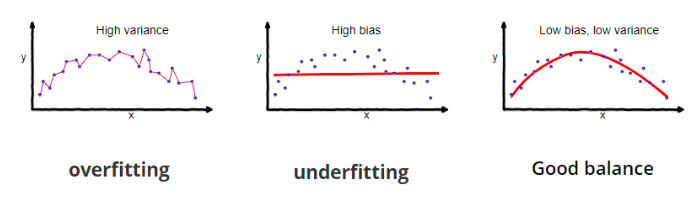

### 4. Ajuste de hiperparametros 

In [248]:
bias_KnnClass, var_KnnClass, error_KnnClass, = [], [], []

top = 21

for k in range(1,top):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
                                        clf_knn, 
                                        X_train.to_numpy(), 
                                        y_train.to_numpy(), 
                                        X_valid.to_numpy(), 
                                        y_valid.to_numpy(), 
                                        loss='0-1_loss',
                                        random_seed=42
    )
    
    
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)

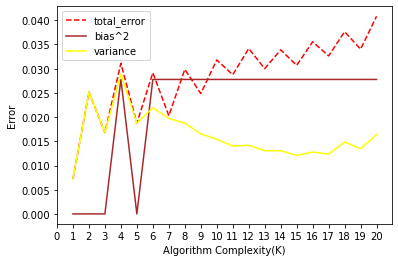

In [249]:
plt.plot(range(1,top), error_KnnClass, 'red', label = 'total_error',linestyle='dashed')
plt.plot(range(1,top), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(1,top), var_KnnClass, 'yellow', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.xticks(range(0, top, 1))
plt.ylabel('Error')
plt.legend()

En la grafica se observa que con n_neighbors = 1 se tiene el mejor balance entre bias y varianza (niveles mas bajos posibles) por lo que ajustaremos nuestro modelo con ese parametro.

In [250]:
knn = KNeighborsClassifier(n_neighbors=1)

In [251]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
                                        knn, 
                                        X_train.to_numpy(), 
                                        y_train.to_numpy(), 
                                        X_valid.to_numpy(), 
                                        y_valid.to_numpy(), 
                                        loss='0-1_loss',
                                        random_seed=42
    )

In [252]:
print(f'Score: {knn.score(X_valid, y_valid)}')

Score: 0.9722222222222222


In [253]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.007
Average bias: 0.000
Average variance: 0.007
Sklearn 0-1 loss: 0.639


Como era previsto, mejoro el score, el bias bajo y la varianza mantuvo un nivel bajo. Por lo que podemos decir que nuestro modelo se encuentra perfectamente balanceado.

### 4. Predicciones con set de prueba. 

In [255]:
knn.score(X_test, y_test)

1.0